In [1]:
import numpy as np
import pandas as pd

### Data analysis and processing

In [2]:
df = pd.read_csv('../data/student_data.csv')
df.describe(include='all')

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
count,357.000000,357,357,357.000000,357,357,357,357.000000,357.000000,357,...,357,357,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
unique,NaN,2,2,NaN,2,2,2,NaN,NaN,5,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,GP,F,NaN,U,GT3,T,NaN,NaN,other,...,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,315,185,NaN,279,250,318,NaN,NaN,127,...,299,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,193.176471,NaN,NaN,16.655462,NaN,NaN,NaN,2.795518,2.546218,NaN,...,NaN,NaN,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.523810
std,115.771252,NaN,NaN,1.268262,NaN,NaN,NaN,1.093999,1.084217,NaN,...,NaN,NaN,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.227797
min,0.000000,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,...,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000
25%,89.000000,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,...,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000
50%,196.000000,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,3.000000,NaN,...,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,292.000000,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,...,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000


In [3]:
df_master = df.copy()

#On va transformer les valeurs binaires 'no' et 'yes' en 0 et 1 pour avoir une représentation graphique de la relation avec les notes.
df_master = df.set_index('StudentID')
yn_map = {'yes': 1, 'no': 0}
df_master = df_master.replace(yn_map)

#On va transformer les valeurs binaires 'LE3' et 'GT3' en 0 et 1 pour avoir une représentation graphique de la relation avec les notes.
famsize_map = {'GT3': 1, 'LE3': 0}
df_master = df_master.replace(famsize_map)

# On fait One-hot-encoding pour les variables catégorielles indépendantes.
one_hot_cols = ['school', 'sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
transformed_one_hot = pd.get_dummies(df_master[one_hot_cols])
df_master = df_master.drop(one_hot_cols, axis=1)
df_master = df_master.join(transformed_one_hot)
df_master

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
StudentID,,,,,,,,,,,,,,,,,,,,,
0,18,1,4,4,2,2,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,1,2,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,15,0,1,1,1,2,3,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3,15,1,4,2,1,3,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
4,16,1,3,3,1,2,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,0,2,2,1,2,2,0,1,1,...,0,1,0,1,0,0,0,0,0,1
391,17,0,3,1,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
392,21,1,1,1,1,1,3,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [4]:
df.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,315,185,279,250,318,127,196,126,248,307,219,184,180,286,343,299,245


In [5]:
df_master.describe(include='number')

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,0.700280,2.795518,2.546218,1.431373,2.042017,0.271709,0.140056,0.613445,0.484594,...,0.54902,0.280112,0.072829,0.352941,0.271709,0.098039,0.277311,0.229692,0.694678,0.075630
std,1.268262,0.458778,1.093999,1.084217,0.686075,0.831895,0.671750,0.347532,0.487644,0.500464,...,0.49829,0.449684,0.260221,0.478555,0.445465,0.297785,0.448300,0.421225,0.461190,0.264777
min,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,1.000000,3.000000,3.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,18.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,22.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# On n'a pas besoin de remplir les valeurs manquantes. Toutes les caractéristiques sont complètes
df_master.isna().sum()

age                  0
famsize              0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
schoolsup            0
famsup               0
paid                 0
activities           0
nursery              0
higher               0
internet             0
romantic             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
FinalGrade           0
school_GP            0
school_MS            0
sex_F                0
sex_M                0
address_R            0
address_U            0
Pstatus_A            0
Pstatus_T            0
Mjob_at_home         0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_at_home         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_course        0
reason_home          0
reason_othe

array([[<AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>],
       [<AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>],
       [<AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>],
       [<AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        <AxesSubplot:xlabel='FinalGrade'>,
        

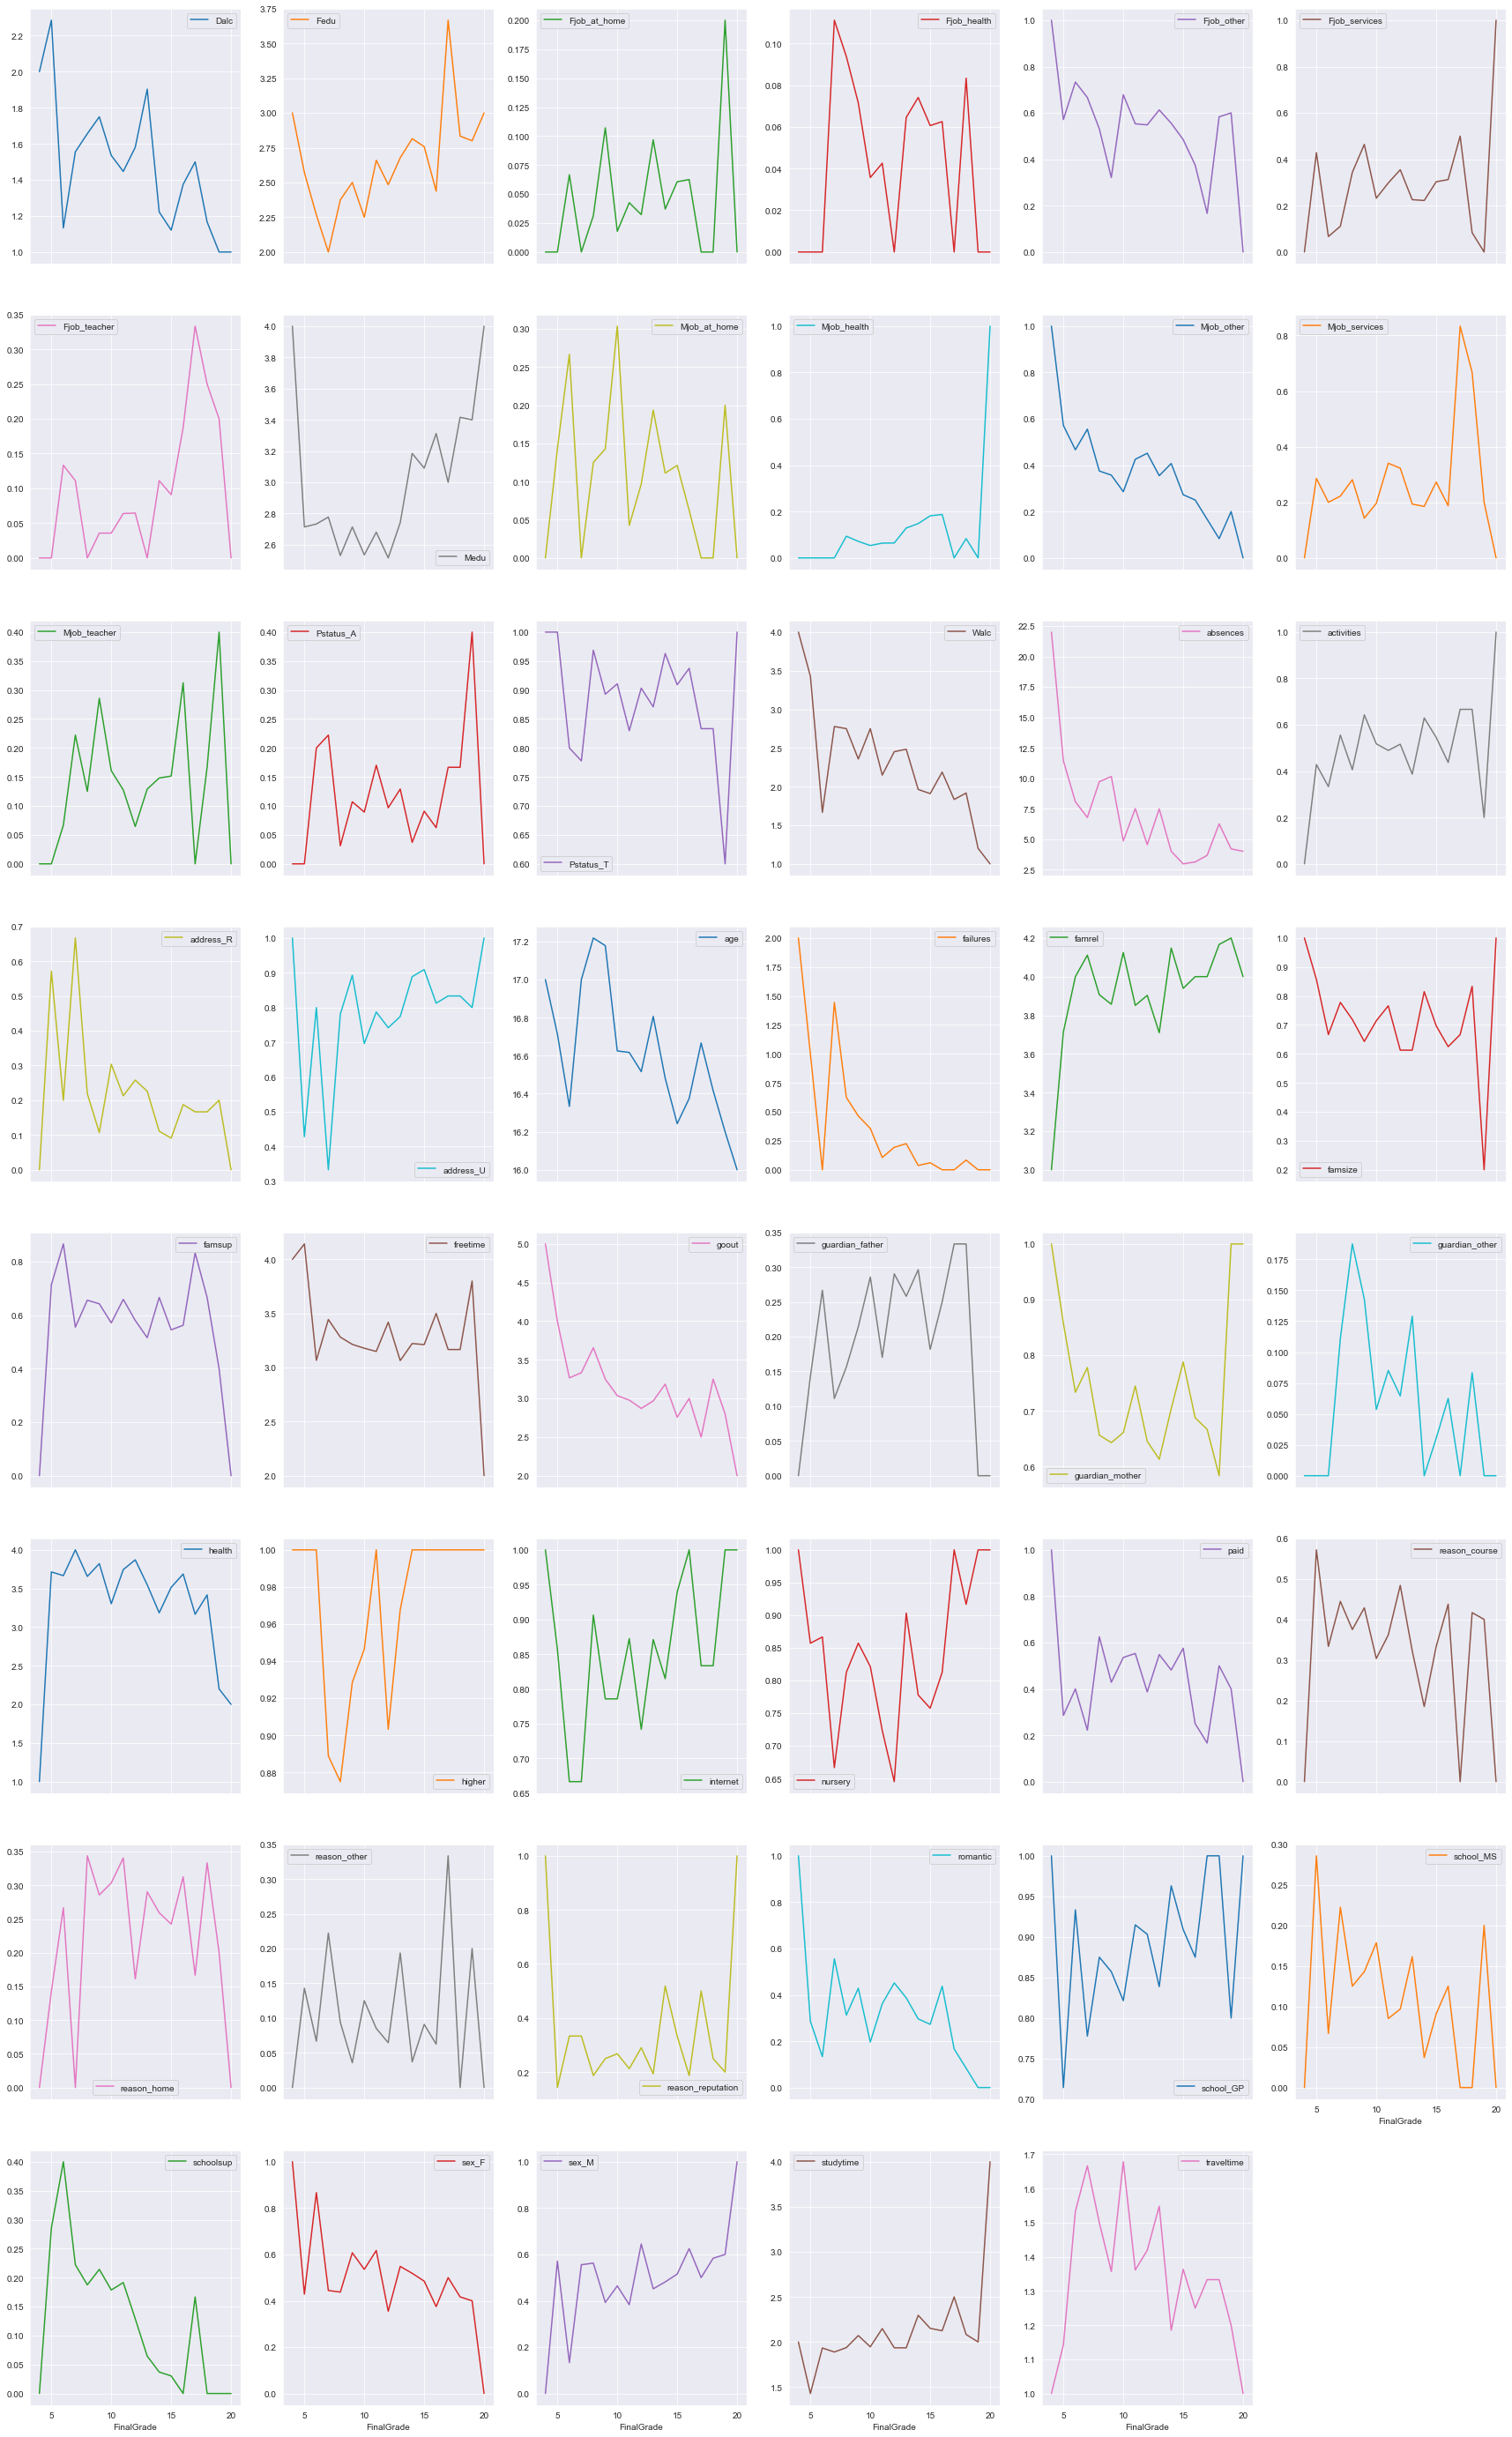

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

pd.pivot_table(df_master, index='FinalGrade').plot(layout=(8,6), figsize=(30,50), subplots=True, sort_columns=True)

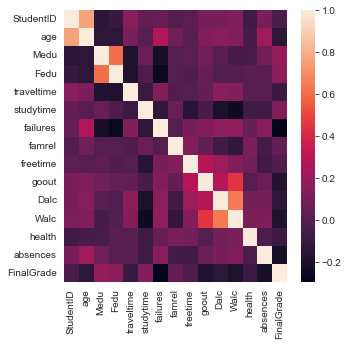

In [8]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr());

### Calculating values for graphic

In [9]:
result = []

# Avec les relations au-dessus, j'ai choisi les paramètres qui ont un impact positif à la note et celles qui ont un impact négatif pour donner des scores +1 ou +2 respectivement.
to_sum_1 = ['Fedu', 'Medu', 'Mjob_services', 'Fjob_teacher', 'activities', 'address_U', 'famrel', 'internet', 'higher', 'nursery', 'studytime']
to_sum_2 = ['Dalc', 'Fjob_other', 'Mjob_other', 'Walc', 'absences', 'address_R', 'failures', 'goout', 'guardian_other', 'health', 'paid', 'romantic', 'schoolsup']

# On fait le calcul final de chaque élève
for i, row in df_master.iterrows():
    result.append(row[to_sum_1].sum()+row[to_sum_2].sum()*2)

print(result, np.mean(result))

# On centre la data pour avoir un ranking de 0 - 100
result = (result - np.min(result)) / (np.max(result) - np.min(result)) * 100
print(result)

[50, 38, 64, 43, 49, 64, 36, 48, 30, 41, 35, 43, 48, 44, 37, 45, 50, 47, 87, 52, 27, 38, 43, 50, 46, 66, 43, 45, 52, 96, 48, 36, 39, 33, 40, 33, 42, 58, 47, 46, 89, 67, 45, 25, 73, 63, 66, 40, 47, 46, 45, 44, 63, 49, 60, 55, 31, 43, 40, 43, 56, 69, 38, 54, 47, 37, 61, 53, 45, 64, 40, 37, 57, 44, 159, 60, 46, 45, 40, 59, 43, 52, 62, 49, 42, 67, 41, 47, 59, 85, 47, 50, 46, 32, 50, 37, 43, 48, 50, 45, 89, 42, 49, 92, 38, 59, 55, 46, 67, 55, 50, 38, 50, 50, 52, 49, 39, 37, 91, 51, 29, 57, 47, 83, 45, 50, 37, 39, 69, 68, 72, 44, 37, 51, 44, 36, 36, 38, 55, 64, 64, 37, 38, 56, 62, 34, 68, 64, 37, 55, 59, 55, 36, 36, 38, 49, 53, 62, 50, 54, 65, 47, 63, 46, 42, 154, 58, 70, 39, 44, 50, 46, 50, 30, 77, 62, 35, 38, 50, 66, 91, 37, 50, 57, 42, 71, 57, 110, 55, 51, 50, 54, 65, 86, 41, 82, 61, 43, 96, 74, 44, 44, 45, 33, 53, 38, 75, 62, 42, 78, 58, 67, 40, 74, 49, 71, 60, 62, 76, 28, 78, 50, 40, 46, 39, 85, 63, 42, 50, 52, 54, 33, 42, 44, 51, 50, 57, 81, 38, 37, 45, 77, 59, 64, 72, 89, 54, 36, 34, 

Text(0, 0.5, "Complexité d'accompagnement")

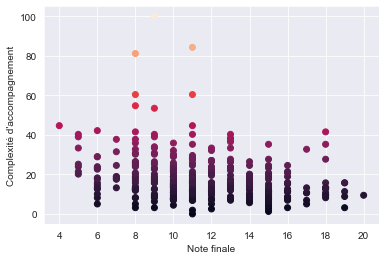

In [10]:
plt.scatter(df_master['FinalGrade'], result, c=result)
plt.xlabel('Note finale')
plt.ylabel("Complexité d'accompagnement")

# Dans le graphique ci-dessous, on a le graphique qui montre les élèves et les notes et la complexité pour faire l'accompagnement